In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='NanumGothic'
#https://teddylee777.github.io/visualization/matplotlib-%EC%8B%9C%EA%B0%81%ED%99%94-%ED%95%9C%EA%B8%80%ED%8F%B0%ED%8A%B8%EC%A0%81%EC%9A%A9

In [2]:
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
from xgboost import plot_importance
from matplotlib.pylab import rcParams

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [4]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [5]:
from sklearn.metrics import r2_score

### 남자

In [ ]:
reg_b_0 = ['강원','경남','경북', '대구', '부산','인천','전남','전북','충남']
reg_b_1 = ["경기","서울"]
reg_b_2 = ['광주','대전','울산','제주', '충북', '세종']

reg_g_0 = ['경남','경북','부산', '전남', '전북']
reg_g_1 = ["경기","서울"]
reg_g_2 = ['강원','광주','대구','대전','울산','인천','제주','충남', '충북', '세종']

**reg_1에 속한 경우:3**

**reg_0에 속한 경우:2**

**reg_2에 속한 경우:1**

**성별에 따라 reg0,1이 다른 경우 1.5**

In [42]:
pop = pd.DataFrame()
pop["지역"] = ["경기","서울",'광주','대전','울산','제주', '충북', '세종','강원','경남','경북', '대구', '부산','인천','전남','전북','충남']
pop["인구라벨"] = [3,3,1,1,1,1,1,1,1.5,2,2,1.5,2,1.5,2,2,1.5]

In [43]:
실습_df = pd.read_csv("데이터정리.csv")
예측_df = pd.read_csv("예측data.csv", encoding = 'cp949')

In [44]:
실습_df

,일시,지역,기온,평균기온,최고기온,일교차,체감온도,폭염,한파,평균 상대습도,최소 상대습도,PM10,NO2,O3,CO,SO2,남,여,발생횟수
0,2012-01-01,강원,-2.035577,-2.58,1.55,8.16,-10.592308,0,0.0,62.530769,40.769231,84.494318,0.020873,0.019098,1.012879,0.010033,3,3,6
1,2012-01-01,경기,5.600000,-3.72,0.72,8.90,-12.100000,0,0.0,69.400000,43.750000,85.856368,0.030538,0.012957,0.945866,0.009000,4,5,9
2,2012-01-01,경남,18.032500,1.16,6.65,9.90,-7.657143,0,0.0,59.228571,41.642857,62.136905,0.017499,0.021283,0.653175,0.008975,2,1,3
3,2012-01-01,경북,24.787500,-0.26,4.62,9.42,-10.550000,0,0.0,60.007143,43.285714,80.067915,0.013319,0.024346,0.723632,0.009346,6,1,7
4,2012-01-01,광주,19.182500,1.00,4.00,6.30,-8.300000,0,0.0,77.100000,65.000000,50.203704,0.024338,0.014366,0.742130,0.005657,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18627,2014-12-31,전남,1.700000,2.38,8.56,10.89,-8.453846,0,0.0,70.236364,43.272727,48.700980,0.018209,0.021210,0.568709,0.004783,1,0,1
18628,2014-12-31,전북,15.320000,0.59,5.25,8.25,-9.370000,0,0.0,69.890000,43.400000,53.059324,0.014642,0.021798,0.576137,0.005813,1,1,2
18629,2014-12-31,제주,22.762500,8.57,14.33,11.43,-2.825000,0,0.0,62.600000,32.000000,83.895833,0.009877,0.043344,0.418229,0.003116,0,0,0
18630,2014-12-31,충남,22.165385,-0.48,2.94,7.24,-11.240000,0,0.0,70.720000,40.400000,33.808333,0.016269,0.019873,0.705000,0.004369,2,0,2


In [45]:
dfdf = pd.merge(실습_df, pop, left_on = '지역', right_on = '지역', how = 'inner')
dfdf2 = pd.merge(예측_df, pop, left_on = '지역', right_on = '지역', how = 'inner' )

In [46]:
pop_df=dfdf["인구라벨"]
pop_df2 = dfdf2["인구라벨"]

dfdf.drop("인구라벨", axis=1, inplace = True)
dfdf.insert(2, "인구라벨", pop_df)

dfdf2.drop("인구라벨", axis=1, inplace = True)
dfdf2.insert(5, "인구라벨", pop_df2)


In [47]:
실습_df = dfdf
예측_df = dfdf2

In [48]:
실습_df['일시'] = 실습_df.일시.apply(pd.to_datetime)
실습_df.insert(1,'일', 실습_df.일시.apply(lambda x: x.day))
실습_df.insert(1,'월', 실습_df.일시.apply(lambda x: x.month))
실습_df.insert(1,'년', 실습_df.일시.apply(lambda x: x.year))
실습_df.drop(['일시','기온'], axis=1, inplace = True)

예측_df.drop(['Unnamed: 0', '불쾌지수'], axis=1, inplace = True)
예측_df.rename(columns={'년도':'년'}, inplace =True)

DI_list=[]
for idx, value in 실습_df[["평균기온","평균 상대습도"]].iterrows():
    #print(value)
    Ta = float(value[0])
    RH = float(value[1])
    DI = 9*Ta/5-0.55*(1-RH)/(9*Ta/5-26)+32
    if DI>=86:
        number=5
    elif DI>=83:
        number=4
    elif DI>=80:
        number=3    
    elif DI>=75:
        number=2        
    elif DI>=70:
        number=1
    else:
        number=0
    DI_list.append(number)

DI2_list=[]
for idx, value in 예측_df[["평균기온","평균 상대습도"]].iterrows():
    #print(value)
    Ta = float(value[0])
    RH = float(value[1])
    DI = 9*Ta/5-0.55*(1-RH)/(9*Ta/5-26)+32
    DI2_list.append(DI)
    
실습_df.insert(8, '불쾌지수',DI_list)
예측_df.insert(8, '불쾌지수', DI2_list)

공휴일_df = pd.read_csv("holiday.csv")
공휴일2_df=공휴일_df[['날짜','휴무여부']]
공휴일2_df['날짜'] = 공휴일2_df.날짜.apply(pd.to_datetime)
공휴일2_df.insert(1,'일', 공휴일2_df.날짜.apply(lambda x: x.day))
공휴일2_df.insert(1,'월', 공휴일2_df.날짜.apply(lambda x: x.month))
공휴일2_df.insert(1,'년', 공휴일2_df.날짜.apply(lambda x: x.year))
공휴일2_df.drop('날짜', axis=1, inplace = True)

실습_df = pd.merge(실습_df, 공휴일2_df, left_on = ['년','월','일'], right_on = ['년','월','일'], how = 'inner')
휴무여부 = 실습_df['휴무여부']
실습_df.drop('휴무여부', axis=1, inplace = True)
실습_df.insert(4, '휴무여부',휴무여부)

예측_df = pd.merge(예측_df, 공휴일2_df, left_on = ['년','월','일'], right_on = ['년','월','일'], how = 'inner')
휴무여부 = 예측_df['휴무여부']
예측_df.drop('휴무여부', axis=1, inplace = True)
예측_df.insert(4, '휴무여부',휴무여부)

df_all = pd.concat([실습_df, 예측_df],axis=0)

minmax_x = MinMaxScaler()
minmax_x.fit(df_all.iloc[:,:-3].drop("지역",axis=1))

minmax_boy = MinMaxScaler()
minmax_boy.fit(pd.DataFrame(실습_df.iloc[:,-3]))

minmax_girl = MinMaxScaler()
minmax_girl.fit(pd.DataFrame(실습_df.iloc[:,-2]))

data = 실습_df.drop("지역", axis=1).iloc[:,:-3]
data_df = pd.DataFrame(minmax_x.transform(data))
data_df.columns = data.columns

target = pd.DataFrame(실습_df.iloc[:,-3])
target_df = pd.DataFrame(minmax_boy.transform(target))
target_df.columns = ["남"]

target_g_df = pd.DataFrame(실습_df.iloc[:,-2])
target_g_df = pd.DataFrame(minmax_girl.transform(target_g_df))
target_g_df.columns = ["여"]

#data_df.describe()

col = list(data_df.columns)
skew_list2 = []
for comp in col:
    if data_df[comp].skew()>=1:
        skew_list2.append(comp)

for skew in skew_list2:
    globals()["{}_log".format(skew)] = np.log1p(data_df[skew])
    
for skew in skew_list2:
    data_df[skew]=globals()["{}_log".format(skew)]

target2_df = np.log1p(target_df)
target3_df = np.log1p(target_g_df)

In [49]:
실습2_df = pd.concat([data_df,target2_df,target3_df], axis=1)
실습2_df.insert(0, "지역", 실습_df["지역"])

q1 = 실습2_df["NO2"].quantile(0.25)
q3 = 실습2_df["NO2"].quantile(0.75)
IQR = q3-q1
cd = q3+IQR*2

condition = (실습2_df["NO2"] >cd)
drop_index =실습2_df[condition].index

실습3_df = 실습2_df.drop(drop_index)
train = 실습3_df.iloc[:,:-1]

In [50]:
실습3_df

,지역,년,월,일,휴무여부,인구라벨,평균기온,최고기온,일교차,불쾌지수,...,한파,평균 상대습도,최소 상대습도,PM10,NO2,O3,CO,SO2,남,여
0,강원,0.0,0.0,0.0,1.0,0.25,0.250420,0.244422,0.289463,0.246198,...,0.0,0.577573,0.387045,0.317015,0.213497,0.210729,0.389349,0.338282,0.207639,0.207639
1,경기,0.0,0.0,0.0,1.0,1.00,0.226471,0.227586,0.319803,0.246198,...,0.0,0.655017,0.418421,0.321615,0.306316,0.135812,0.364530,0.307096,0.268264,0.325422
2,경남,0.0,0.0,0.0,1.0,0.50,0.328992,0.347870,0.360804,0.246198,...,0.0,0.540345,0.396241,0.238307,0.178950,0.237374,0.248269,0.306342,0.143101,0.074108
3,경북,0.0,0.0,0.0,1.0,0.50,0.299160,0.306694,0.341123,0.246198,...,0.0,0.549122,0.413534,0.301916,0.134425,0.274737,0.277515,0.317666,0.379490,0.074108
4,광주,0.0,0.0,0.0,1.0,0.00,0.325630,0.294118,0.213202,0.246198,...,0.0,0.741826,0.642105,0.193615,0.247773,0.152996,0.285054,0.199005,0.000000,0.143101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18627,전남,0.5,1.0,1.0,0.0,0.50,0.354622,0.386613,0.401394,0.246198,...,0.0,0.664446,0.413397,0.187843,0.186320,0.236481,0.212041,0.168680,0.074108,0.000000
18628,전북,0.5,1.0,1.0,0.0,0.50,0.317017,0.319473,0.293153,0.246198,...,0.0,0.660541,0.414737,0.204493,0.148739,0.243664,0.215280,0.204307,0.074108,0.074108
18629,제주,0.5,1.0,1.0,0.0,0.00,0.484664,0.503651,0.423534,0.246198,...,0.0,0.578354,0.294737,0.314987,0.096218,0.506488,0.144057,0.108191,0.000000,0.000000
18630,충남,0.5,1.0,1.0,0.0,0.25,0.294538,0.272617,0.251743,0.246198,...,0.0,0.669899,0.383158,0.128761,0.166053,0.220176,0.269864,0.153987,0.143101,0.000000


In [51]:
# 학습이 완료된 모델을 인자로 받아서 테스트 데이터로 예측하고 RMSE를 계산
def get_rmse(model, is_expm1=True):
    pred = model.predict(X_test).reshape(-1,1)
    if is_expm1 == True:
        pred = np.expm1(pred)
        pred = minmax_boy.inverse_transform(pred)
        y_test2 = np.expm1(np.array(y_test).reshape(-1,1))
        y_test2 = minmax_boy.inverse_transform(pd.DataFrame(y_test2))
    else:
        pred = minmax_boy.inverse_transform(pred)
        y_test2 = minmax_boy.inverse_transform(y_test)
    #y_test2 = pd.DataFrame(y_test2)

    mse = mean_squared_error(y_test2 , pred)
    rmse = np.sqrt(mse)
    #print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

# 여러 모델들을 list 형태로 인자로 받아서 개별 모델들의 RMSE를 list로 반환. 
def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

#gridsearch를 통해 최적 hyperparameter 출력
def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])


In [52]:
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [53]:
y_target = 실습3_df.iloc[:,-2]
X_features = 실습3_df.iloc[:,1:-2]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

In [54]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000,2000,3000],'learning_rate':[0.01, 0.03, 0.05]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.0802, 최적 alpha:{'learning_rate': 0.01, 'n_estimators': 1000}


In [55]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000,2000,3000], 'learning_rate':[0.01,0.03, 0.05]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.08, 최적 alpha:{'learning_rate': 0.03, 'n_estimators': 1000}


rmse값: 1.241493910431296 
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)r2_score: 0.4467679666434


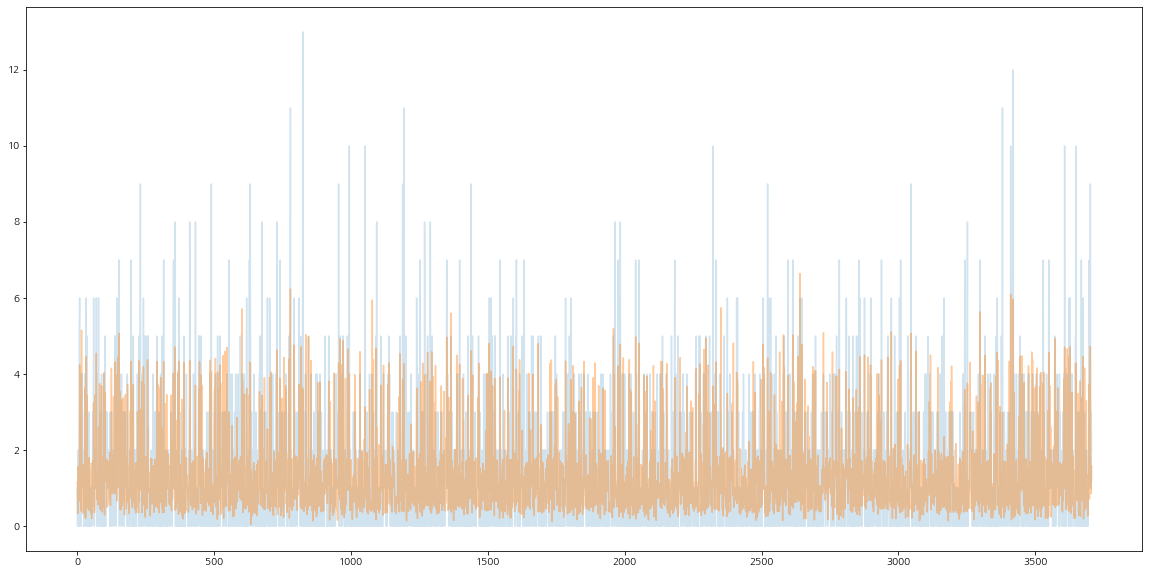

rmse값: 1.2400548446536774 
LGBMRegressor(colsample_bytree=0.4, learning_rate=0.03, n_estimators=1000,
              num_leaves=4, reg_lambda=10, subsample=0.6)r2_score: 0.4480497705445624


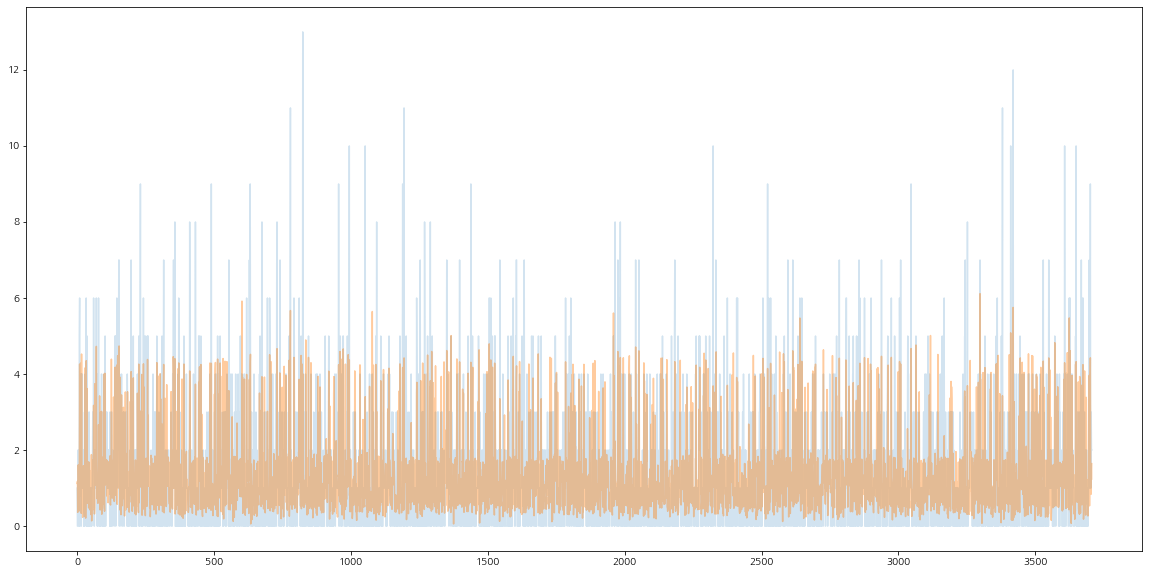

In [56]:
models = [best_xgb, best_lgbm]


for model in models:
    plt.figure(figsize = (20,10))
    pred = model.predict(X_test).reshape(-1,1)
    pred = minmax_boy.inverse_transform(np.expm1(pred))


    print("rmse값: {} ".format(get_rmse(model,is_expm1 = True)))
    
    y_test2 = minmax_boy.inverse_transform(np.expm1(np.array(y_test).reshape(-1,1)))
    print("{0}r2_score: {1}".format(model,r2_score(y_test2,pred)))
    a = pd.DataFrame(pred)
    plt.plot(y_test2, alpha = 0.2)
    plt.plot(a, alpha = 0.4)
    plt.show()

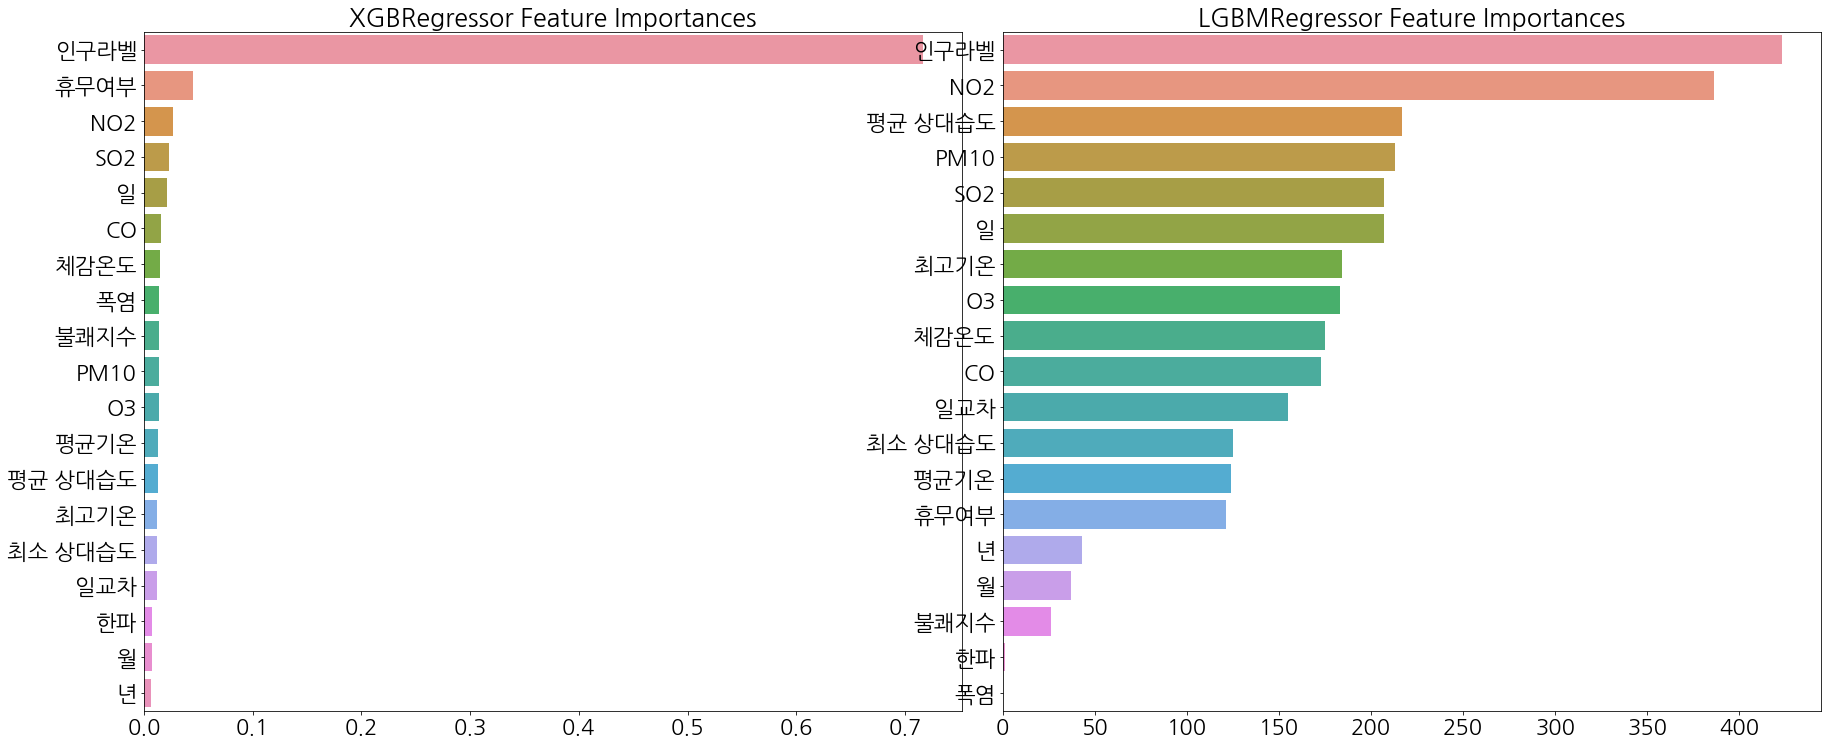

In [57]:
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

**스태킹 앙상블**

In [58]:
ridge_reg = Ridge()
lasso_reg = Lasso()

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.0821, 최적 alpha:{'alpha': 0.1}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.0828, 최적 alpha:{'alpha': 0.001}


In [59]:
ridge_reg = Ridge(alpha=0.05)
lasso_reg = Lasso(alpha=0.001)
xgb_reg = XGBRegressor(n_estimators=3000, learning_rate=0.01, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=3000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

In [60]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values.reshape(-1)

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)


Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [61]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)
meta_model_lasso = Lasso(0.005)
meta_model_Ridge = Ridge(0.005)
meta_model_xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01, 
                       colsample_bytree=0.5, subsample=0.8)
meta_model_lgbm=LGBMRegressor(n_estimators=1000, learning_rate=0.005, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

meta_model_lasso.fit(Stack_final_X_train, y_train)
meta_model_Ridge.fit(Stack_final_X_train, y_train)
meta_model_xgb.fit(Stack_final_X_train, y_train)
meta_model_lgbm.fit(Stack_final_X_train, y_train)


final_lasso = meta_model_lasso.predict(Stack_final_X_test)
final_Ridge = meta_model_Ridge.predict(Stack_final_X_test)
final_xgb = meta_model_xgb.predict(Stack_final_X_test)
final_lgbm = meta_model_lgbm.predict(Stack_final_X_test)

In [62]:
predict = [final_lasso, final_Ridge, final_xgb, final_lgbm]

In [63]:
models = [meta_model_lasso,meta_model_Ridge,meta_model_xgb,meta_model_lgbm]

스태킹 회귀 모델의 최종 RMSE 값은: 1.6443686423388144
Lasso(alpha=0.005)r2_score: 0.029453150729051525


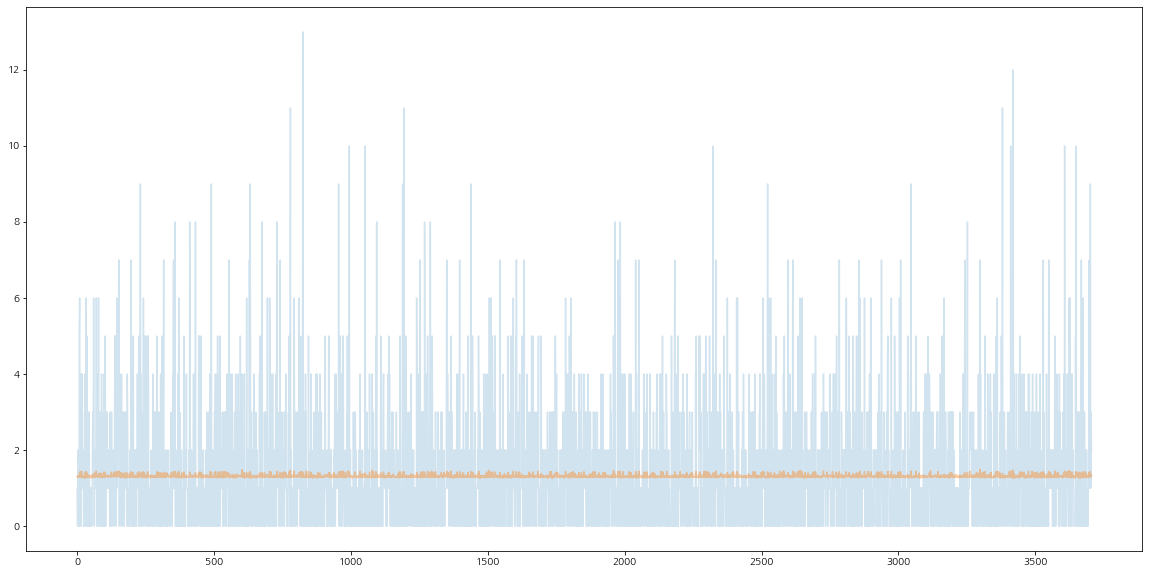

스태킹 회귀 모델의 최종 RMSE 값은: 1.24853286449372
Ridge(alpha=0.005)r2_score: 0.44047681317843335


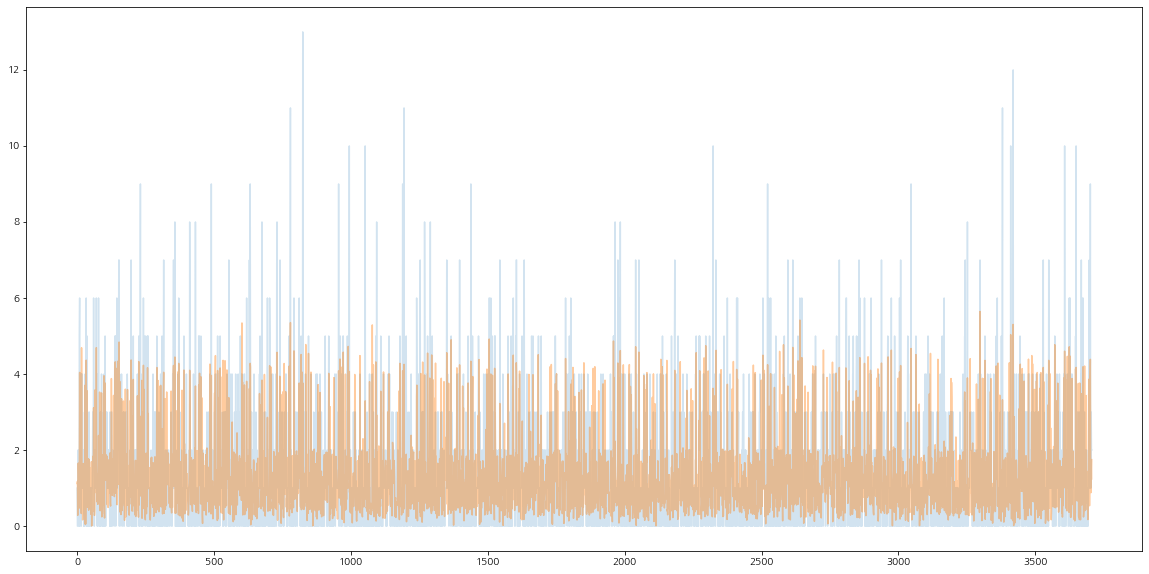

스태킹 회귀 모델의 최종 RMSE 값은: 1.2459062511537977
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)r2_score: 0.4428285416940082


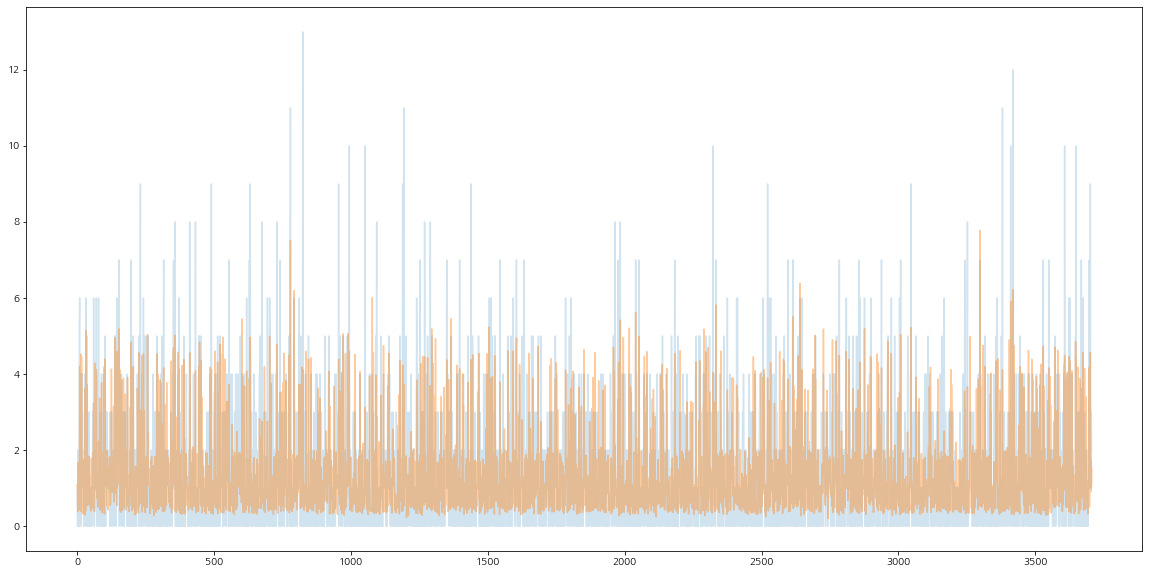

스태킹 회귀 모델의 최종 RMSE 값은: 1.244454558653836
LGBMRegressor(colsample_bytree=0.4, learning_rate=0.005, n_estimators=1000,
              num_leaves=4, reg_lambda=10, subsample=0.6)r2_score: 0.44412618412496274


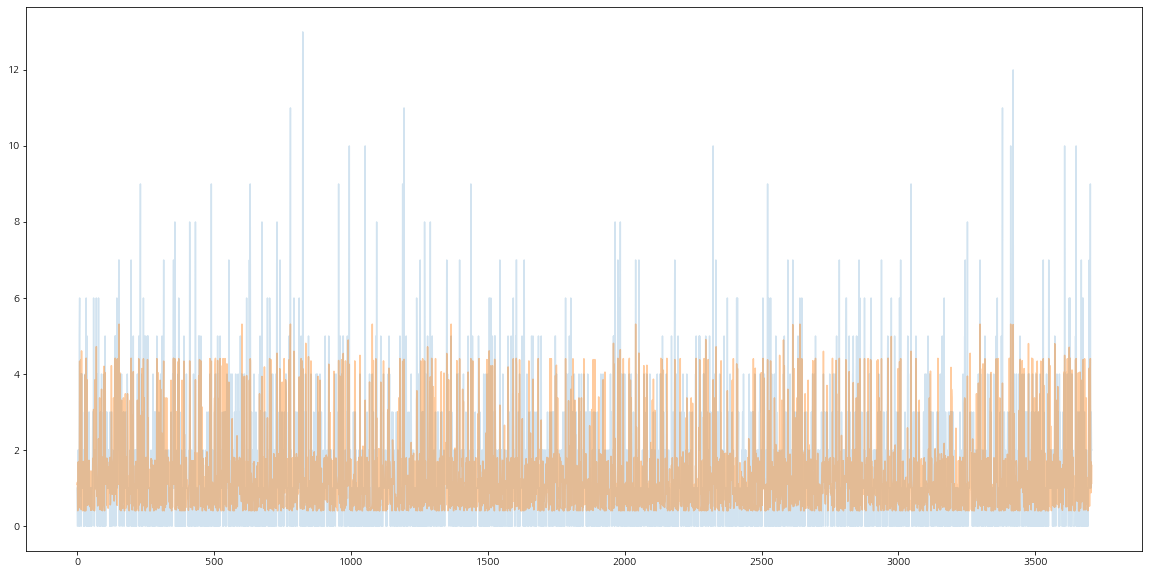

In [64]:
for model in models:
    plt.figure(figsize = (20,10))
    pred = model.predict(Stack_final_X_test)
    pred = minmax_boy.inverse_transform(np.expm1(pred.reshape(-1,1)))

    mse = mean_squared_error(y_test2 , pred)
    rmse = np.sqrt(mse)
    print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)
    
    print("{0}r2_score: {1}".format(model,r2_score(y_test2,pred)))
    a = pd.DataFrame(pred)
    plt.plot(y_test2, alpha = 0.2)
    plt.plot(a, alpha = 0.4)
    plt.show()

In [88]:
predict_df = df_all[df_all["년"] == 2016]
predict_지역 = predict_df["지역"]

predict_df.drop(["지역","남","여","발생횟수"],axis=1, inplace = True)
predict_columns = predict_df.columns

predict_df = pd.DataFrame(minmax_x.transform(predict_df))
predict_df.columns = predict_columns

for skew in skew_list2:
    globals()["{}_log".format(skew)] = np.log1p(predict_df[skew])
    
for skew in skew_list2:
    predict_df[skew]=globals()["{}_log".format(skew)]


predict_df.insert(0,"지역",predict_지역)

In [89]:
predict_df.head()

,지역,년,월,일,휴무여부,인구라벨,평균기온,최고기온,일교차,불쾌지수,체감온도,폭염,한파,평균 상대습도,최소 상대습도,PM10,NO2,O3,CO,SO2
0,강원,1.0,0.0,0.0,1.0,0.25,0.315772,0.312997,0.347873,0.250534,0.343872,0.0,0.0,0.592837,0.400000,0.225189,0.196000,0.220345,0.302010,0.143319
1,경기,1.0,0.0,0.0,1.0,1.00,0.298319,0.305071,0.384584,0.250292,0.344428,0.0,0.0,0.780440,0.586842,0.288819,0.373652,0.076760,0.358791,0.189320
2,경남,1.0,0.0,0.0,1.0,0.50,0.341687,0.396697,0.501084,0.250817,0.364482,0.0,0.0,0.603479,0.324060,0.213351,0.250418,0.180246,0.250639,0.156202
3,경북,1.0,0.0,0.0,1.0,0.50,0.327281,0.363952,0.468869,0.250666,0.340294,0.0,0.0,0.576260,0.338346,0.215703,0.195428,0.270267,0.268766,0.202360
4,광주,1.0,0.0,0.0,1.0,0.00,0.371849,0.377282,0.348503,0.251113,0.399421,0.0,0.0,0.696731,0.484211,0.236277,0.284417,0.134189,0.310846,0.112860


In [93]:
xgb_predict = best_xgb.predict(predict_df.iloc[:,1:])
lgbm_predict = best_lgbm.predict(predict_df.iloc[:,1:])

In [97]:
np.corrcoef(xgb_predict,lgbm_predict)

array([[1.        , 0.98913353],
       [0.98913353, 1.        ]])

In [103]:
boy_predict= minmax_boy.inverse_transform(np.expm1(pd.DataFrame(lgbm_predict)))
girl_predict = minmax_girl.inverse_transform(np.expm1(pd.DataFrame(lgbm_predict)))

In [107]:
boy_result = pd.DataFrame(boy_predict)
girl_result = pd.DataFrame(girl_predict)

boy_result["지역"] = predict_df["지역"]
girl_result["지역"] = predict_df["지역"]

In [112]:
boy_result.sort_values(by = "지역", inplace = True)

In [113]:
girl_result.sort_values(by = "지역", inplace = True)

In [114]:
dates = pd.date_range('2016-01-01','2016-12-31', freq ='D')
date_all = dates
for i in range(16):
    date_all = date_all.append(dates)

boy_result.insert(0,"yyyymmdd",date_all)
girl_result.insert(0,"yyyymmdd",date_all)

In [115]:
sex_list = []
sex_list2 =[]
for i in range(6222):
    sex_list.append("1")
    sex_list2.append("2")

boy_result.insert(2,"sex",sex_list)
girl_result.insert(2,"sex",sex_list2)

In [118]:
boy_result_all = boy_result.reset_index(drop=True)
girl_result_all = girl_result.reset_index(drop=True)

In [122]:
boy_result_all.rename(columns = {0:"frequency"}, inplace= True)

In [124]:
boy_result_all.rename(columns = {"지역":"area"}, inplace= True)

girl_result_all.rename(columns = {0:"frequency"}, inplace= True)
girl_result_all.rename(columns = {"지역":"area"}, inplace= True)

In [119]:
ver_set = pd.read_csv("2-2_검증데이터셋.csv", encoding = 'cp949')

In [125]:
boy_result_all["yyyymmdd"] = boy_result_all["yyyymmdd"].astype("object")
boy_result_all["sex"] = boy_result_all["sex"].astype("int")
boy_result_all["frequency"] = boy_result_all["frequency"].astype("float")

girl_result_all["sex"] = girl_result_all["sex"].astype("int")
girl_result_all["frequency"] = girl_result_all["frequency"].astype("float")

In [126]:
new_time = []
for idx,date in boy_result_all.iterrows():
    time = str(date['yyyymmdd'])[0:10]
    new_time.append(time)

In [127]:
boy_result_all["yyyymmdd"] = new_time
girl_result_all["yyyymmdd"] = new_time

result_all_df = pd.concat([boy_result_all, girl_result_all], axis=0)

ver_set1 = pd.merge(ver_set, result_all_df, left_on = ['yyyymmdd','area','sex'], right_on = ['yyyymmdd','area','sex'], how = 'inner')

ver_set1.drop("frequency_x",axis=1, inplace =True)
ver_set1.rename(columns = {"frequency_y":"frequency"}, inplace=True)

In [129]:
ver_set1

,yyyymmdd,area,sex,frequency
0,2016-01-01,강원,1,1.938040
1,2016-01-01,경기,1,4.213596
2,2016-01-01,경남,1,1.169373
3,2016-01-01,경북,1,1.703400
4,2016-01-01,광주,1,0.239306
...,...,...,...,...
12439,2016-12-31,전남,2,1.628203
12440,2016-12-31,전북,2,1.827142
12441,2016-12-31,제주,2,0.437537
12442,2016-12-31,충남,2,0.841144


In [130]:
ver_set1.to_csv("합친예측결과df.csv",encoding='cp949')